In [132]:
# --- Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import kagglehub
warnings.filterwarnings('ignore')

In [133]:
path = kagglehub.dataset_download("nikhil1e9/loan-default")
df = pd.read_csv(f"{path}/Loan_default.csv")

print("Initial Shape:", df.shape)
print("\n")
df.head()

Using Colab cache for faster access to the 'loan-default' dataset.
Initial Shape: (255347, 18)




,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [134]:
dummy_df = df.copy()

In [135]:
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [136]:
# Data Cleaning
dummy_df = df.drop_duplicates()
if 'LoanID' in df.columns:
    df = df.drop('LoanID', axis=1)

print("After Cleaning:", df.shape)

After Cleaning: (255347, 17)


In [137]:
print("Missing Values:", dummy_df.isnull().sum().sum())

Missing Values: 0


# **Business Context:**
Loan defaults occur when borrowers fail to repay, causing financial losses for banks. This analysis aims to identify key borrower traits. Like age, income,
credit score, and employment type, that increase the likelihood of default.

In [138]:
# Feature Engineering (for better visuals)
dummy_df['AgeGroup'] = pd.cut(df['Age'], bins=[18,30,40,50,60,70],
                        labels=['18–30','31–40','41–50','51–60','61–70'])
dummy_df['IncomeGroup'] = pd.cut(df['Income'],bins=[15000,30000,60000,90000,120000,150000],
                                        labels=['15K–30K','30K–60K','60K–90K','90K–120K','120K–150K'])
dummy_df['LoanBucket'] = pd.cut(df['LoanAmount'], bins=[5000,50000,100000,150000,200000,250000],
                          labels=['5k-50K','50k–100K','100k–150K','150k–200K','200K-250k'])

In [139]:
# Label Encoding for Categorical Data

from sklearn.preprocessing import LabelEncoder
cat_cols = ['Education','EmploymentType','MaritalStatus','HasMortgage',
            'HasDependents','LoanPurpose','HasCoSigner']

In [140]:
# Overview of Numeric Features
num_cols = ['Age','Income','LoanAmount','CreditScore','MonthsEmployed',
            'NumCreditLines','InterestRate','LoanTerm','DTIRatio']

dummy_df[num_cols].describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000


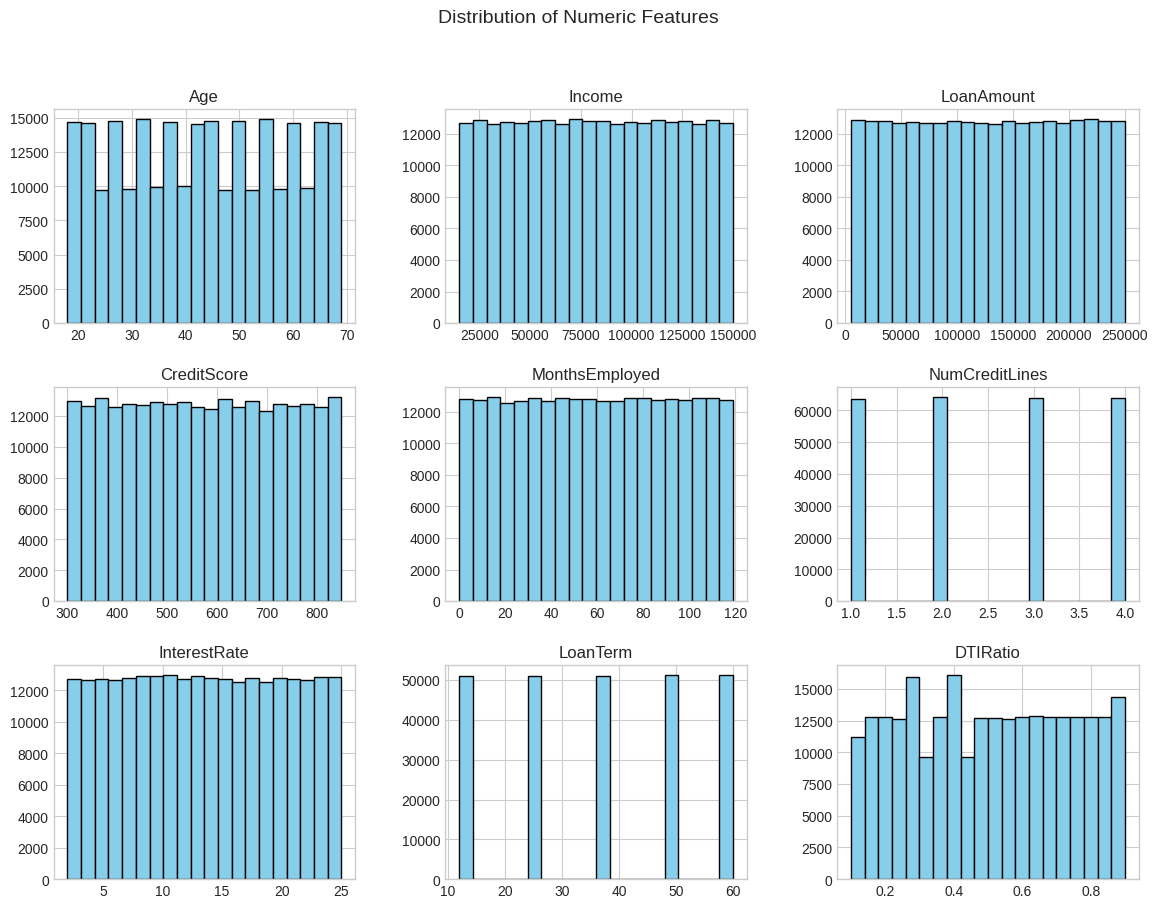

In [141]:
# Distribution of Numeric Features
dummy_df[num_cols].hist(bins=20, figsize=(14,10), color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numeric Features', fontsize=14)
plt.show()

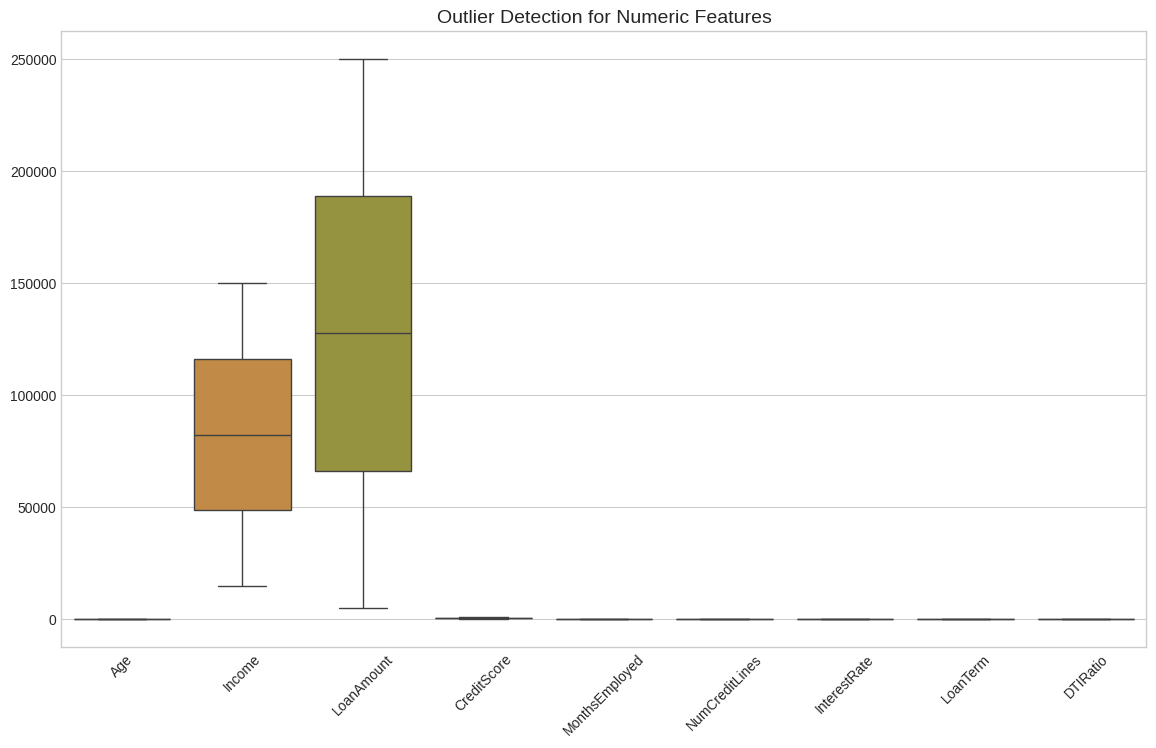

In [142]:
# Outlier Detection
plt.figure(figsize=(14,8))
sns.boxplot(data=dummy_df[num_cols])
plt.title("Outlier Detection for Numeric Features", fontsize=14)
plt.xticks(rotation=45)
plt.show()

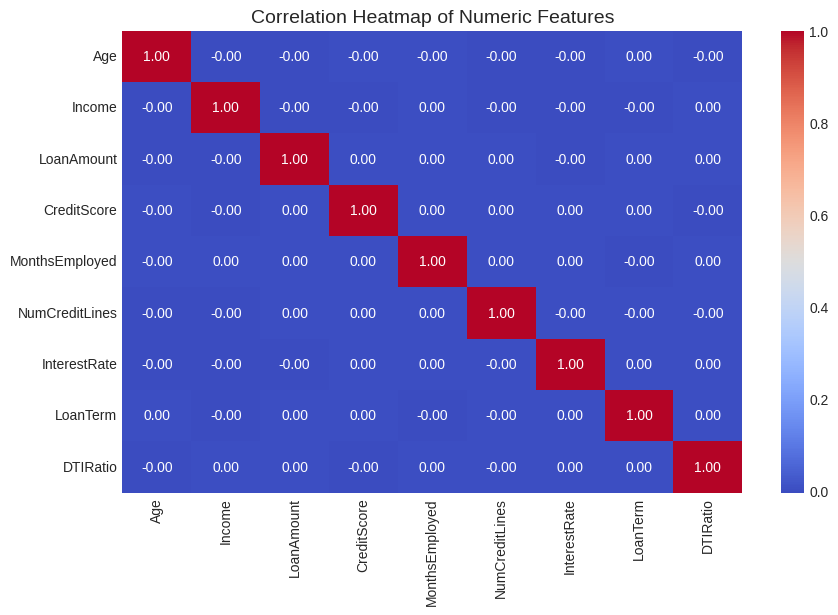

In [143]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(dummy_df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features", fontsize=14)
plt.show()

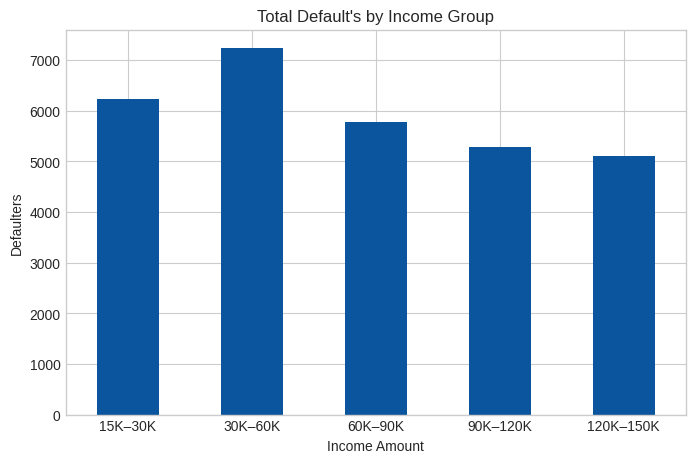

In [144]:
# Loan Purpose
plt.figure(figsize=(8,5))
dummy_df.groupby('IncomeGroup')['Default'].sum().plot(kind='bar')
plt.title("Total Default's by Income Group")
plt.xlabel("Income Amount")
plt.ylabel("Defaulters")
plt.xticks(rotation=0)
plt.show()

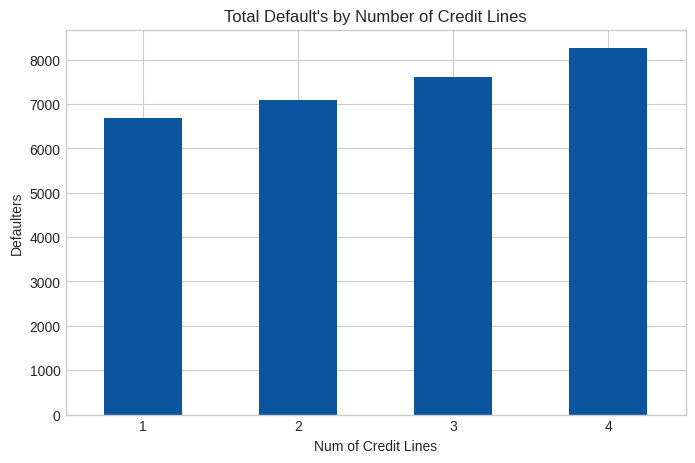

In [145]:
# Credit Lines
plt.figure(figsize=(8,5))
dummy_df.groupby('NumCreditLines')['Default'].sum().plot(kind='bar')
plt.title("Total Default's by Number of Credit Lines")
plt.xlabel("Num of Credit Lines")
plt.ylabel("Defaulters")
plt.xticks(rotation=0)
plt.show()

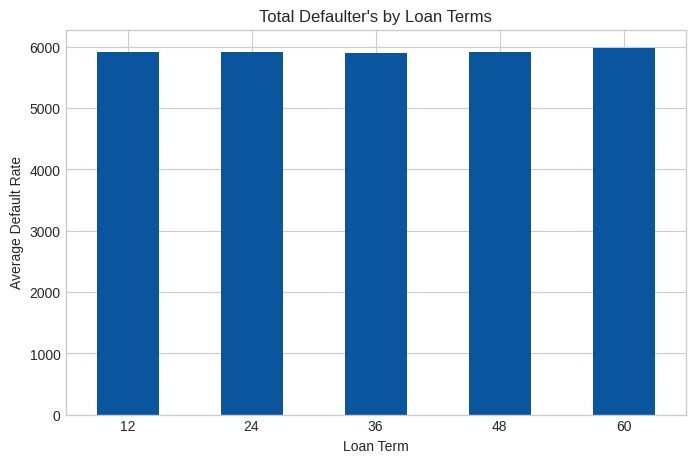

In [146]:
# Loan Term
plt.figure(figsize=(8,5))
df.groupby('LoanTerm')['Default'].sum().plot(kind='bar')
plt.title("Total Defaulter's by Loan Terms")
plt.xlabel("Loan Term")
plt.ylabel("Average Default Rate")
plt.xticks(rotation=0)
plt.show()


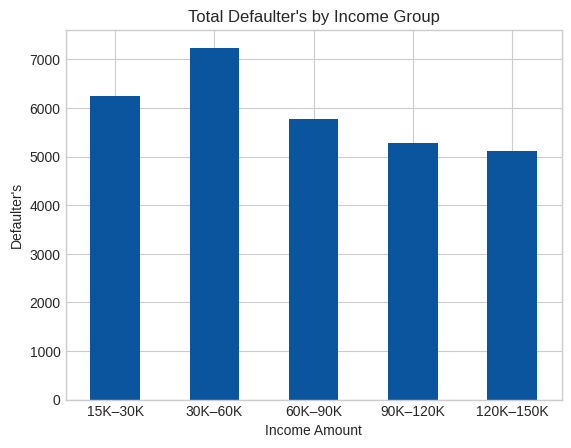

In [147]:
# Income Amount
dummy_df.groupby('IncomeGroup')['Default'].sum().plot(kind='bar')
plt.title("Total Defaulter's by Income Group")
plt.xlabel("Income Amount")
plt.ylabel("Defaulter's")
plt.xticks(rotation=0)
plt.show()

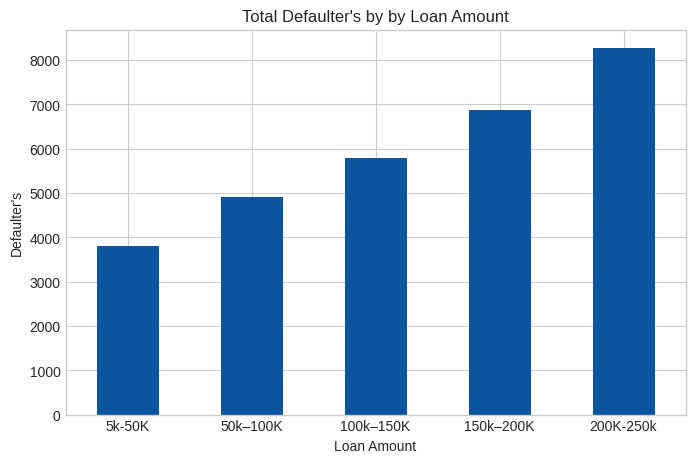

In [148]:
# Loan Amount
plt.figure(figsize=(8,5))
dummy_df.groupby('LoanBucket')['Default'].sum().plot(kind='bar')
plt.title("Total Defaulter's by by Loan Amount")
plt.xlabel("Loan Amount")
plt.ylabel("Defaulter's")
plt.xticks(rotation=0)
plt.show()

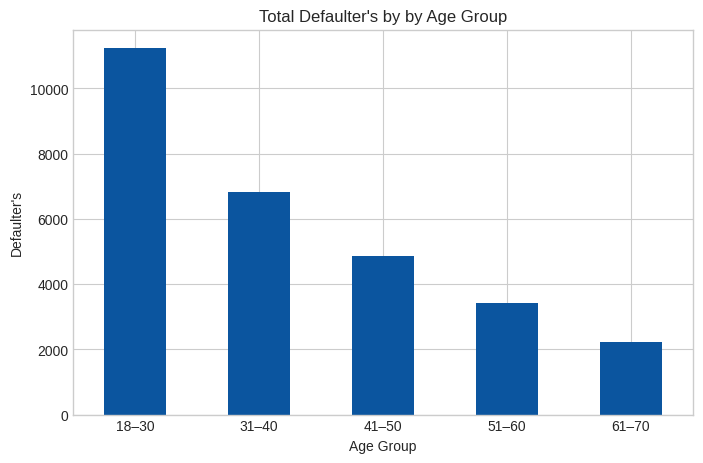

In [149]:
# Age Group
plt.figure(figsize=(8,5))
dummy_df.groupby('AgeGroup')['Default'].sum().plot(kind='bar')
plt.title("Total Defaulter's by by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Defaulter's")
plt.xticks(rotation=0)
plt.show()

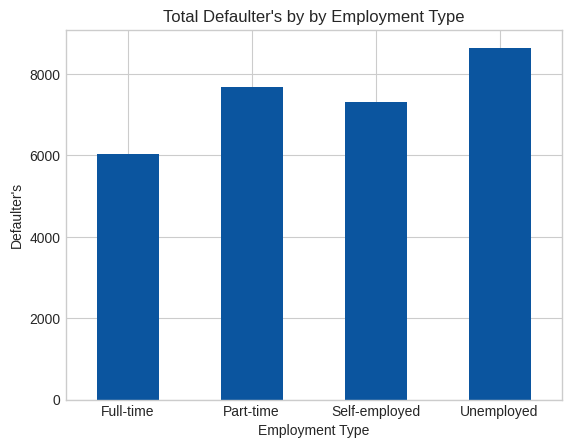

In [150]:
# Employment Type
dummy_df.groupby('EmploymentType')['Default'].sum().plot(kind='bar')
plt.title("Total Defaulter's by by Employment Type")
plt.xlabel("Employment Type")
plt.ylabel("Defaulter's")
plt.xticks(rotation=0)
plt.show()

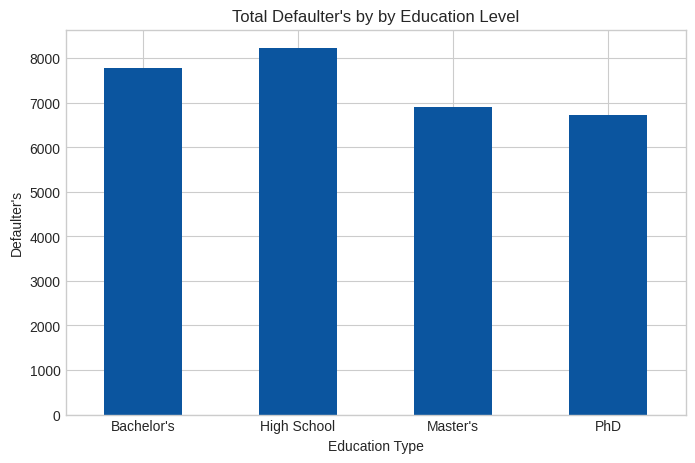

In [151]:
# Education
plt.figure(figsize=(8,5))
dummy_df.groupby('Education')['Default'].sum().plot(kind='bar')
plt.title("Total Defaulter's by by Education Level")
plt.xlabel("Education Type")
plt.ylabel("Defaulter's")
plt.xticks(rotation=0)
plt.show()

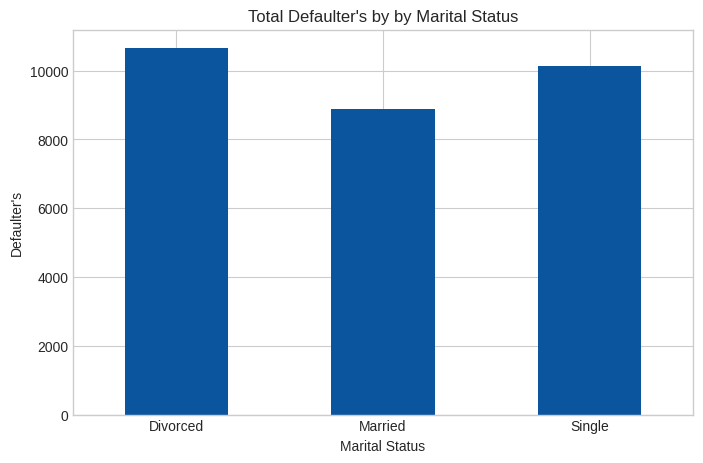

In [152]:
# Marital Status
plt.figure(figsize=(8,5))
dummy_df.groupby('MaritalStatus')['Default'].sum().plot(kind='bar')
plt.title("Total Defaulter's by by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Defaulter's")
plt.xticks(rotation=0)
plt.show()

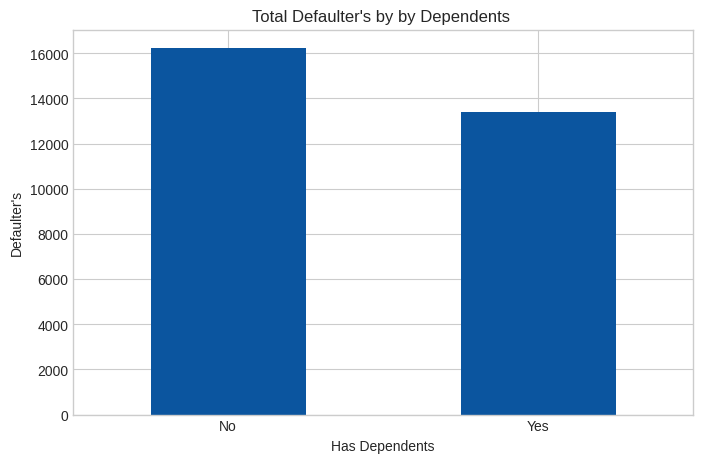

In [153]:
# Dependents
plt.figure(figsize=(8,5))
dummy_df.groupby('HasDependents')['Default'].sum().plot(kind='bar')
plt.title("Total Defaulter's by by Dependents ")
plt.xlabel("Has Dependents")
plt.ylabel("Defaulter's")
plt.xticks(rotation=0)
plt.show()

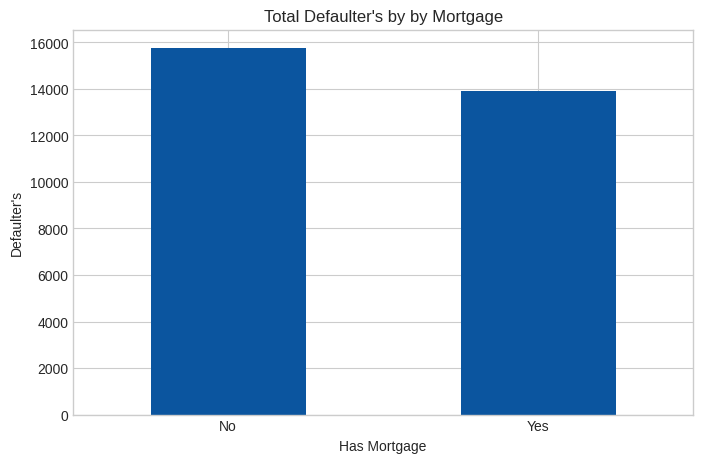

In [154]:
# Mortgage
plt.figure(figsize=(8,5))
dummy_df.groupby('HasMortgage')['Default'].sum().plot(kind='bar')
plt.title("Total Defaulter's by by Mortgage")
plt.xlabel("Has Mortgage")
plt.ylabel("Defaulter's")
plt.xticks(rotation=0)
plt.show()

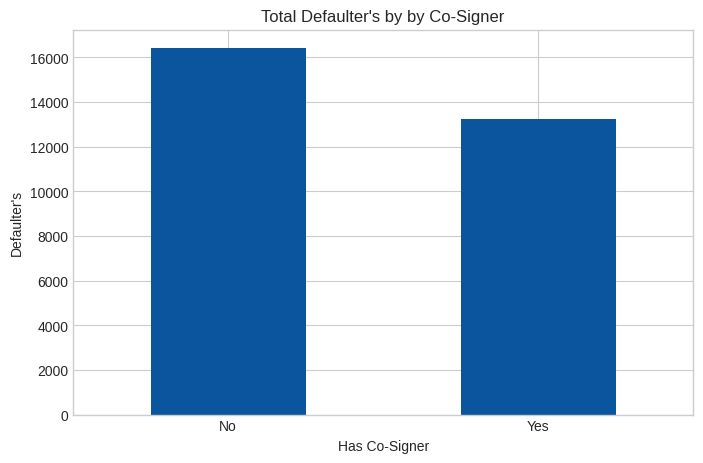

In [155]:
plt.figure(figsize=(8,5))
dummy_df.groupby('HasCoSigner')['Default'].sum().plot(kind='bar')
plt.title("Total Defaulter's by by Co-Signer")
plt.xlabel("Has Co-Signer")
plt.ylabel("Defaulter's")
plt.xticks(rotation=0)
plt.show()


# **Key Insights:**

*   Business and Auto loans have the highest default rates (~21%).
*   Younger borrowers (<35) and unemployed individuals default most.
*   Defaults rise for longer loan terms and larger loan amounts.
*   Borrowers with multiple credit lines show increased risk.
*   Married, educated, and mortgage-holding borrowers repay more reliably.
*   Those without dependents or co-signers are more likely to default.